In [8]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import StaleElementReferenceException

In [2]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load library
from nltk.corpus import stopwords

# You will have to download the set of stop words the first time
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jia.C.Chen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
from selenium import webdriver

In [4]:
from bs4 import BeautifulSoup
from urllib.request import build_opener, HTTPCookieProcessor, Request

link = 'https://shop.lululemon.com/c/women/_/N-7vfZ1z12l0t?mnid=mn;en-US-JSON;women;features;bestsellers'
# opener = urllib.build_opener(urllib.HTTPCookieProcessor())
opener = build_opener(HTTPCookieProcessor())
response = opener.open(link, timeout=30)
response
# content = response.read()
# content

# page = urllib2.urlopen(link)

In [5]:
lulu_page = BeautifulSoup(response, "html.parser")
lulu_page

<!DOCTYPE doctype html>
<html lang="en"><!-- TODO: ENSURE LANG IS PROVIDED BY CONFIG --><head><meta charset="utf-8"/><title data-react-helmet="true">Women's Bestsellers | lululemon athletica</title><link data-react-helmet="true" href="https://shop.lululemon.com/c/women/_/N-7vf" hreflang="en-US" rel="alternate" type="link"/><link data-react-helmet="true" href="https://shop.lululemon.com/c/women/_/N-7z5" hreflang="en-CA" rel="alternate" type="link"/><link data-react-helmet="true" href="https://fr.shop.lululemon.com/c/women/_/N-7z5" hreflang="fr-CA" rel="alternate" type="link"/><link data-react-helmet="true" href="https://www.lululemon.com.au/c/women/_/N-7rr" hreflang="en-AU" rel="alternate" type="link"/><link data-react-helmet="true" href="https://www.lululemon.co.nz/c/women/_/N-7rr" hreflang="en-NZ" rel="alternate" type="link"/><link data-react-helmet="true" href="https://www.lululemon.com.hk/c/women/_/N-7rs" hreflang="en-hk" rel="alternate" type="link"/><link data-react-helmet="true" h

In [6]:
all_items = lulu_page.findAll("a", {"class": "link product-tile__image-link"})
all_links = []

for item in all_items:
    all_links.append(item['href'])

test_link = all_links[1]

# test_link_working = 'https://shop.lululemon.com' + test_link
test_link_working = 'https://shop.lululemon.com/p/women-pants/Dance-Studio-Pant-III-R/_/prod1520006?color=31382'
product_page = opener.open(test_link_working)

In [10]:
driver = webdriver.Chrome()
driver.get(test_link_working)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
element = driver.find_elements_by_xpath("//span[@class='BVRRPageLink BVRRNextPage']/a[@title='next']")
page_num = driver.find_elements_by_xpath("//span[@class='BVRRPageLink BVRRPageNumber']")
length = int(page_num[-1].text)
actions = ActionChains(driver)
text_reviews = []

for i in range(length-1):
    try:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        run_test = WebDriverWait(driver, 120).until( \
        EC.presence_of_element_located((By.XPATH, "//span[@class='BVRRPageLink BVRRNextPage']/a[@title='next']")))
        driver.execute_script("arguments[0].scrollIntoView(false);", run_test)
        all_reviews = driver.find_elements_by_class_name("BVRRContentReview")
        for review in all_reviews:
            try:
                review_text = review.find_element_by_class_name("BVRRReviewText")
                stars = review.find_element_by_class_name("BVImgOrSprite")
                stars_text = stars.get_attribute("title")
                text_reviews.append((review_text.text, stars_text[0]))
            except:
                print("missing review")
        print(text_reviews)
        run_test.click()
    except:
        print("exception")
        
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
all_reviews = driver.find_elements_by_class_name("BVRRContentReview")
for review in all_reviews:
    review_text = review.find_element_by_class_name("BVRRReviewText")
    stars = review.find_element_by_class_name("BVImgOrSprite")
    stars_text = stars.get_attribute("title")
    text_reviews.append((review_text.text, stars_text[0]))

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

missing review
[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

missing review
[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

missing review
[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

[('I got the capri version of this pant in June & wore it incessantly throughout France and switzerland,. Traveling, hiking, out to dinner, darn near everything. Just love them. Wd prefer long pants so bought these. Same great material but different design. Lower waist, or as I experience it, shorter inseam, uncomfortable at the crotch. Ironically too long at the ankle/foot too. Returned them.', '1'), ('These pants are my go-to for teaching ballet. Light weight, flexible, and comfortable. I think I own them in every color.', '5'), ('The material is high quality and the fit at the waist and hips is perfect. However the lower legs are much too full and the length is too long. The drawstrings at the hem are helpful but it’s not enough to help with the lack of taper at the hem', '2'), ('I now own 4 pairs of these pants, love them! I weigh 150 pounds and purchased size 8 and they fit perfectly! These are my go to pants every day!', '5'), ("I love these dance studio pants they are casual, co

In [11]:
print(length)

14


In [11]:
item = driver.find_elements_by_xpath("//h1[@class='pdp-title']/div")
item_name = item[0].text

In [12]:
reviews_df = pd.DataFrame(text_reviews)
reviews_df['Item_Name'] = item_name
reviews_df.columns = ['Review_Text', 'Rating', 'Item_Name']
# reviews_df.to_csv("fastandfree_pants.xlsx")

# reviews_df = pd.read_csv("align_pants.xlsx")
# reviews_df.drop(['Unnamed: 0'], axis=1, inplace=True)
reviews_df

,Review_Text,Rating,Item_Name
0,I got the capri version of this pant in June &...,1,Dance Studio Pant III\nUnlined
1,These pants are my go-to for teaching ballet. ...,5,Dance Studio Pant III\nUnlined
2,The material is high quality and the fit at th...,2,Dance Studio Pant III\nUnlined
3,"I now own 4 pairs of these pants, love them! I...",5,Dance Studio Pant III\nUnlined
4,I love these dance studio pants they are casua...,5,Dance Studio Pant III\nUnlined
5,These pants are fabulous. They feel comfortabl...,5,Dance Studio Pant III\nUnlined
6,I have the dance studio unlined plants in the ...,5,Dance Studio Pant III\nUnlined
7,Decided to splurge and try these because of al...,3,Dance Studio Pant III\nUnlined
8,"I absolutely LOVE these pants. They’re light, ...",5,Dance Studio Pant III\nUnlined
9,I ordered the 6 for in store pickup but asked ...,2,Dance Studio Pant III\nUnlined


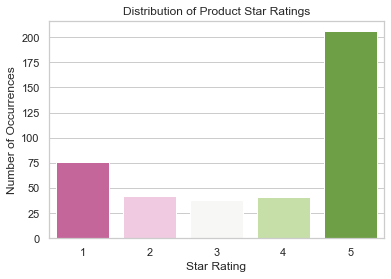

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
rating_count  = reviews_df['Rating'].value_counts()
rating_count
sns.barplot(rating_count.index, rating_count.values,palette="PiYG")
plt.title('Distribution of Product Star Ratings')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Star Rating', fontsize=12)
# plt.savefig("output.png")
plt.show()

In [14]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
import re

In [15]:
all_words = []
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    text = re.sub(r'([.,?!*()])', "", text)
    return(text)

# clean text data
reviews_df["Review_Clean"] = reviews_df["Review_Text"].apply(lambda x: clean_text(x))
reviews_df

,Review_Text,Rating,Item_Name,Review_Clean
0,I got the capri version of this pant in June &...,1,Dance Studio Pant III\nUnlined,get capri version pant june wear incessantly t...
1,These pants are my go-to for teaching ballet. ...,5,Dance Studio Pant III\nUnlined,pant go-to teaching ballet light weight flexib...
2,The material is high quality and the fit at th...,2,Dance Studio Pant III\nUnlined,material high quality fit waist hip perfect ho...
3,"I now own 4 pairs of these pants, love them! I...",5,Dance Studio Pant III\nUnlined,pairs pant love weigh pound purchase size fit ...
4,I love these dance studio pants they are casua...,5,Dance Studio Pant III\nUnlined,love dance studio pant casual comfy look frump...
5,These pants are fabulous. They feel comfortabl...,5,Dance Studio Pant III\nUnlined,pant fabulous feel comfortable soft can’t go w...
6,I have the dance studio unlined plants in the ...,5,Dance Studio Pant III\nUnlined,dance studio unlined plant grey/green color fa...
7,Decided to splurge and try these because of al...,3,Dance Studio Pant III\nUnlined,decide splurge try rave review search comforta...
8,"I absolutely LOVE these pants. They’re light, ...",5,Dance Studio Pant III\nUnlined,absolutely love pant they’re light comfortable...
9,I ordered the 6 for in store pickup but asked ...,2,Dance Studio Pant III\nUnlined,order store pickup ask compare fit well althou...


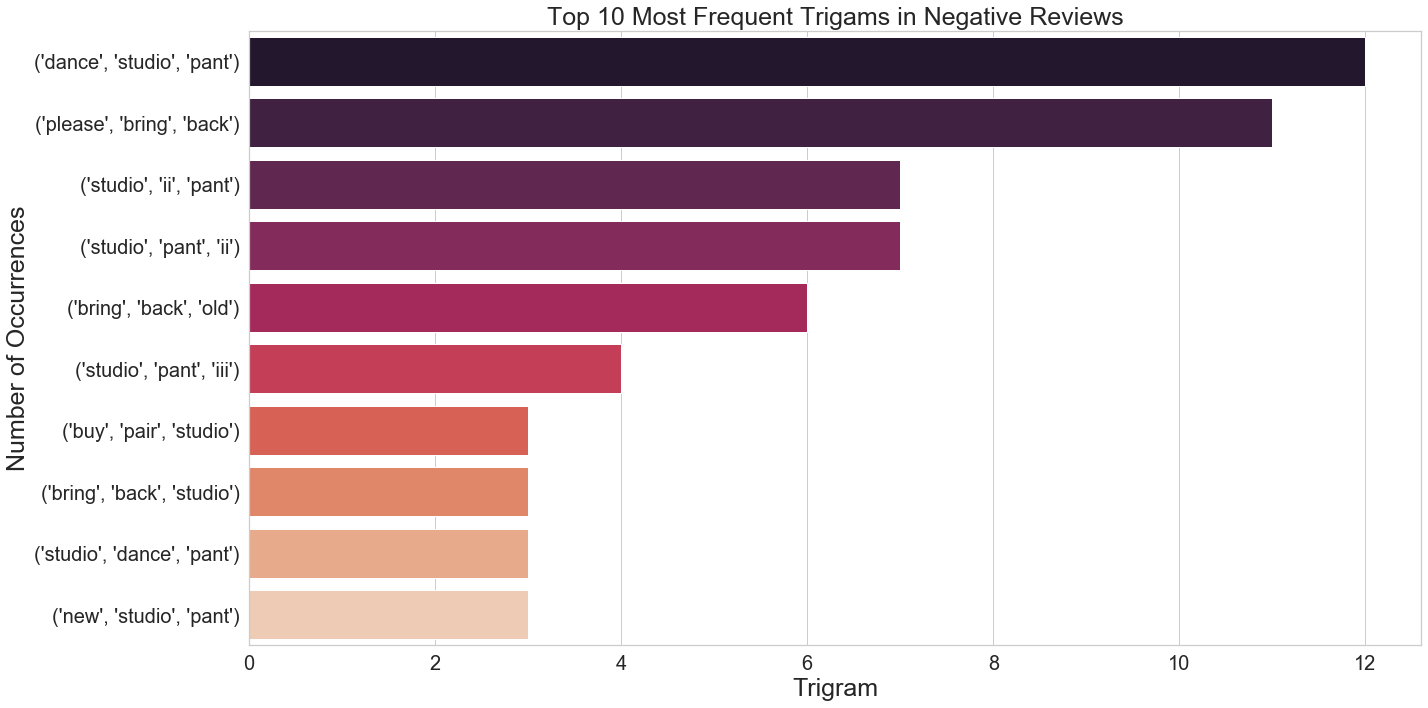

In [16]:
rating = 2
num_of_rev = 3

negative_rev = reviews_df[reviews_df['Rating'].astype('int') < rating]
distribution = negative_rev['Review_Clean'].str.cat(sep=', ')
distribution = distribution.split()

fdist = FreqDist(distribution)
score = {}

def score_text(text):
    text_score = 0
    words = text.split()
    for word in words:
        word = word.strip()
        if word in score:
            text_score += score[word]
    return(text_score)

def create_summary(text):
    negative_rev = text.sort_values(by=['Sentence_Score'], ascending=False)
    negative_rev_sum = negative_rev.iloc[:num_of_rev, :]
    summary = ' '.join(negative_rev_sum["Review_Text"])
    return(summary)

bgs = nltk.trigrams(distribution)
fdist_bi = nltk.FreqDist(bgs)
# for k,v in sorted(fdist_bi.items()):
#     print(k,v)

test = sorted(fdist_bi, key=fdist_bi.get, reverse=True)

frequency = []

for i in test:
    frequency.append((i, fdist_bi[i]))
#     print(i, fdist_bi[i])

frequency = frequency[:10]

frequency_df = pd.DataFrame(frequency)
frequency_df.columns = ['Trigram', 'Count']

plt.figure(figsize=(20, 10))
x = sns.barplot(frequency_df["Count"], frequency_df["Trigram"], palette="rocket")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 10 Most Frequent Trigams in Negative Reviews', fontsize=25)
plt.ylabel('Number of Occurrences', fontsize=25)
plt.xlabel('Trigram', fontsize=25)
plt.tight_layout()
# plt.savefig("neg_trigram.png")
plt.show()

In [17]:
# tfidf practice

def calculate_tf(words):
    tf = {}
    for i in distribution:
        i = i.replace(',', "")
        if i not in tf:
            tf[i] = 1
        else:
            tf[i] += 1
    for item in tf:
        tf[item] = tf[item]/len(distribution)
    return tf

tf_negative = calculate_tf(distribution)
num_term = 1

def calculate_idf(tf_dict):
    idf = {}
    total_num_doc = len(negative_rev)
    for key in tf_negative:
        try:
            num_term = len(negative_rev[negative_rev['Review_Clean'].str.contains(key)])
            if num_term == 0:
                print("found 0 at " + key)
            idf[key] = np.log(int(total_num_doc) / int(num_term))
        except: 
            print("error at " + str(key))
    return idf
        
idf_dict = calculate_idf(tf_negative)

In [18]:
tfidf = {}
for term in tf_negative:
    if term in idf_dict:
        tfidf[term] = tf_negative[term] * idf_dict[term]

score = tfidf
negative_rev["Sentence_Score"] = negative_rev["Review_Clean"].apply(lambda x: score_text(x))
summary = create_summary(negative_rev)
print(summary)

K for starters I should have you all know I have like 8-10 pairs of the studio pant II. Can you say problem? Yes! I get it but i LOVED these pants, I guess I still do. So my early pairs of SP were AWESOME!!! The length was fabulous the construction was awesome! So when I ordered a pair (i can only shop online) and they were surprisingly short, I chalked it up to just an off pair.. no biggy. Then I realized they had changed the length on the regulars, without notice! I continued to purchase because the new length was just enough to be annoying to me but not super noticeable to others. I went into a store when I was on vacation and tried on the black SP III because I will DIE if my II's start looking bad. I literally hang dry everyone of these pants!
THEY ARE TERRIBLE! They are again shorter? The baggy part of the pant which made them look more youthful is GONE! I looked like my mother in a pair of just plain light weight pants. I actually asked the employees if they had any II's left in

C:\Users\Jia.C.Chen\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [19]:
rating = 4
num_of_rev = 3

negative_rev = reviews_df[reviews_df['Rating'].astype('int') > rating]
distribution = negative_rev['Review_Clean'].str.cat(sep=', ')
distribution = distribution.split()


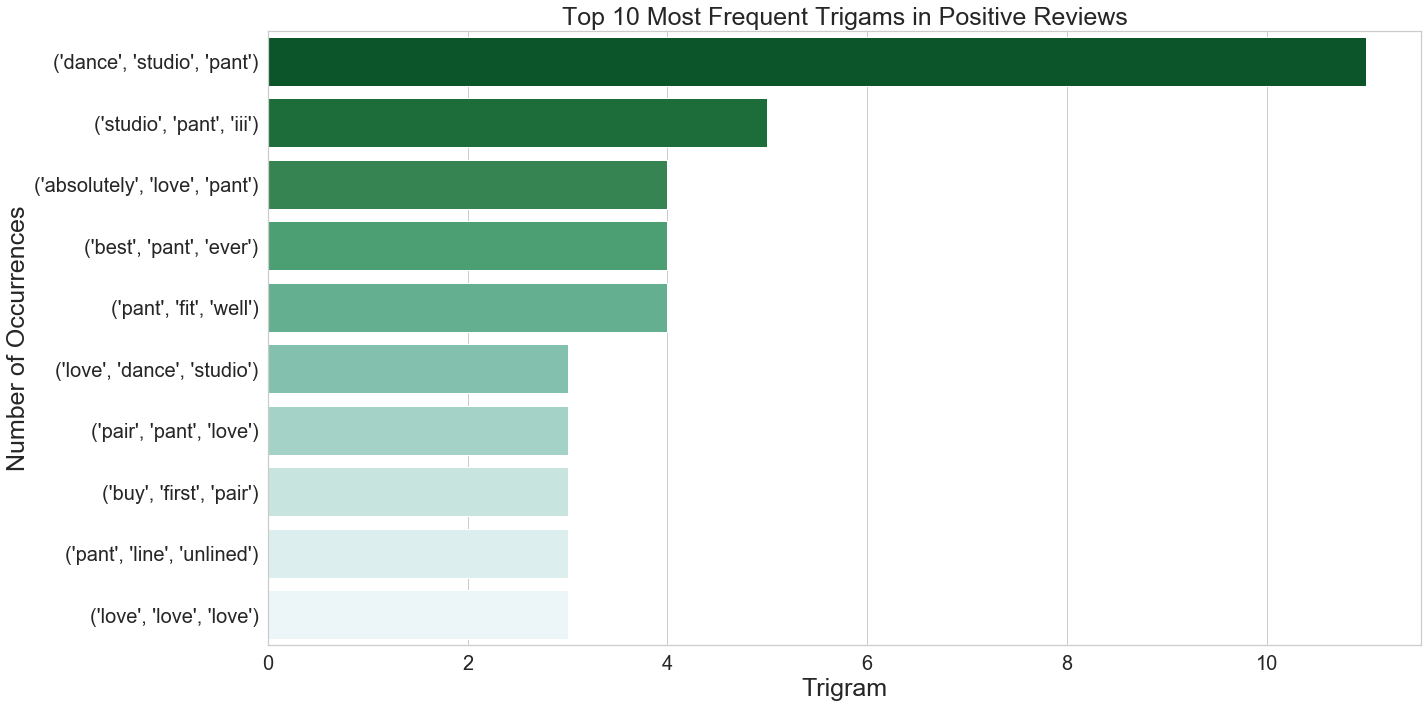

In [20]:
bgs = nltk.trigrams(distribution)
fdist_bi = nltk.FreqDist(bgs)
# for k,v in sorted(fdist_bi.items()):
#     print(k,v)

test = sorted(fdist_bi, key=fdist_bi.get, reverse=True)

frequency = []

for i in test:
    frequency.append((i, fdist_bi[i]))

frequency = frequency[:10]

frequency_df = pd.DataFrame(frequency)
frequency_df.columns = ['Trigram', 'Count']

plt.figure(figsize=(20, 10))
x = sns.barplot(frequency_df["Count"], frequency_df["Trigram"], palette="BuGn_r")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Top 10 Most Frequent Trigams in Positive Reviews', fontsize=25)
plt.ylabel('Number of Occurrences', fontsize=25)
plt.xlabel('Trigram', fontsize=25)
plt.tight_layout()
# plt.savefig("pos_trigram.png")
plt.show()

In [21]:
tf_negative = calculate_tf(distribution)
idf_dict = calculate_idf(tf_negative)

tfidf_pos = {}
for term in tf_negative:
    if term in idf_dict:
        tfidf_pos[term] = tf_negative[term] * idf_dict[term]

score = tfidf_pos
negative_rev["Sentence_Score"] = negative_rev["Review_Clean"].apply(lambda x: score_text(x))
summary = create_summary(negative_rev)
print(summary)

I love these pants and now have a total of 12 pairs between the version 2 and now the 3. Love all of them. I have seen these on all shapes and sizes of women and they look fantastic. The only time I noticed they didn't look good on a lady was when they were way too big on her. They accentuate the waist while hiding belly bulge and no one has a muffin top with these pants. Perfect pockets. Nice and lightweight. I always run hot and these allow air cooling with the lightweight material. I often have new pairs of them hemmed at my dry cleaner. I do not use the cince at the ankle, not a fan but don't mind that it's there. I go from 132-140 5"5 and the 4 is very fitted, 6 is perfect, and 8 is too big in legs. I like to have a couple sizes on hand depending on how I want to wear them. When I spend this kind of money I am meticulous about washing. I use a cold sport laundry liquid soap, turn inside out, tie all waist strings so they do not snag other items, speed wash with only lulu like item

C:\Users\Jia.C.Chen\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
